#### Jennifer Statter 
#### Additional Project 3: Bancassurance
#### Due Feb 14, 7:30 AM

# Background and Context

Best insurance company and My Bank have set up a Bancassurance(Bancassurance is a relationship between a bank and an insurance company), now using the data of liability customers of My Bank, The Best insurance company wants to convert customers with both a life insurance policy and an account in My bank to loan customers(taking a loan against a life insurance policy)

A campaign that the company ran last year for liability customers showed a healthy conversion rate of over 12.56% success. You are provided with data of customers who have an account in My bank and life insurance policy in the Best insurance company 

You as a data scientist at the Best insurance company have to build a model to identify the positively responding customers who have a higher probability of purchasing the insurance. This will increase the success ratio and reduce the cost of the campaign.

# Objective

To predict whether a liability customer will buy a loan or not.
Which variables are most significant for making predictions.
Which segment of customers should be targeted more.

### Data Dictionary
    * CUST_ID: Unique Customer ID
    * Target: Field - 1: Responder, 0: Non-Responder
* Age: Customer Age in years
    * Gender: Male / Female / Other
* Balance: Monthly Average Balance
* Occupation: Professional / Salaried / Self Employed / SelfEmployed Non-Professional.
* SCR: Marketing Score
* HOLDING_PERIOD: Duration in days to hold the money
* ACC_TYPE: Account Type: Current Account / Saving Account
    * ACC_OP_DATE: Account Open Date
* LEN_OF_RLTN_IN_MNTH: Length of Relationship in Months
* NO_OF_L_CR_TXNS: Number of Credit Transactions
* NO_OF_BR_CSH_WDL_DR_TXNS: Branch Cash Withdrawal Debit Transactions
* NO_OF_ATM_DR_TXNS: Number of ATM Debit Transactions
* NO_OF_NET_DR_TXNS: Number of Net Banking Debit Transactions
* NO_OF_MOB_DR_TXNS: Number of Mobile Banking Debit Transactions
* NO_OF_CHQ_DR_TXNS: Number of Cheque Debit Transactions
* FLG_HAS_CC: Has Credit Card - 1: Yes, 0: No
* AMT_ATM_DR: Amount Withdrawn from ATM
* AMT_BR_CSH_WDL_DR: Amount cash withdrawn from Branch
* AMT_CHQ_DR: Amount debited by Cheque Transactions
* AMT_NET_DR: Amount debited by Net Transactions
* AMT_MOB_DR: Amount debited by Mobile Transactions
* FLG_HAS_ANY_CHGS: Flag: Has any banking charges
* FLG_HAS_NOMINEE: Flag: Has Nominee - 1: Yes, 0: No
* FLG_HAS_OLD_LOAN: Flag: Has any earlier loan - 1: Yes, 0: No

### Libaries

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

import sklearn.linear_model as sk

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)



# For pandas profiling
from pandas_profiling import ProfileReport

- The modeling tools will be imported seperatly to decrease CPU cost

## Exploratory Data Analysis

In [2]:
# Loading the data set
from google.colab import files
uploaded = files.upload()
Bank = pd.read_csv('My+Bank.csv')


Saving My+Bank.csv to My+Bank.csv


In [3]:
# copying data to another variable to avoid any changes to original data
data = Bank.copy()

print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string


There are 20000 rows and 26 columns.


In [4]:
data.head()

,CUST_ID,TARGET,AGE,GENDER,BALANCE,OCCUPATION,SCR,HOLDING_PERIOD,ACC_TYPE,ACC_OP_DATE,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,NO_OF_ATM_DR_TXNS,NO_OF_NET_DR_TXNS,NO_OF_MOB_DR_TXNS,NO_OF_CHQ_DR_TXNS,FLG_HAS_CC,AMT_ATM_DR,AMT_BR_CSH_WDL_DR,AMT_CHQ_DR,AMT_NET_DR,AMT_MOB_DR,FLG_HAS_ANY_CHGS,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN
0,C7927,0,27,M,3383.75,SELF-EMP,776,30,SA,3/23/2005,146,7,0,1,2,0,0,0,13100,0,0,973557.0,0,0,1,1
1,C6877,0,47,M,287489.04,SAL,324,28,SA,10-11-2008,104,8,0,1,1,0,0,0,6600,0,0,799813.0,0,1,1,0
2,C19922,0,40,M,18216.88,SELF-EMP,603,2,SA,4/26/2012,61,10,1,1,1,0,2,0,11200,561120,49320,997570.0,0,1,1,1
3,C8183,0,53,M,71720.48,SAL,196,13,CA,07-04-2008,107,36,4,2,3,1,4,0,26100,673590,60780,741506.0,71388,0,1,0
4,C12123,0,36,M,1671622.89,PROF,167,24,SA,12/29/2001,185,20,1,0,0,0,0,0,0,808480,0,0.0,0,0,1,0


#### Droping  non-responders in value to decrease #### dataframe and CPU cost:

In [5]:
data = data[data["TARGET"] != 0]

In [8]:
data.shape

(2512, 26)

#### Data Types:

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 14 to 19999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUST_ID                   2512 non-null   object 
 1   TARGET                    2512 non-null   int64  
 2   AGE                       2512 non-null   int64  
 3   GENDER                    2512 non-null   object 
 4   BALANCE                   2512 non-null   float64
 5   OCCUPATION                2512 non-null   object 
 6   SCR                       2512 non-null   int64  
 7   HOLDING_PERIOD            2512 non-null   int64  
 8   ACC_TYPE                  2512 non-null   object 
 9   ACC_OP_DATE               2512 non-null   object 
 10  LEN_OF_RLTN_IN_MNTH       2512 non-null   int64  
 11  NO_OF_L_CR_TXNS           2512 non-null   int64  
 12  NO_OF_BR_CSH_WDL_DR_TXNS  2512 non-null   int64  
 13  NO_OF_ATM_DR_TXNS         2512 non-null   int64  
 14  NO_OF_

- There are no Null values in the data. 

#### Convert all Floats to Ints:

In [10]:
float_cols = ["AMT_NET_DR", "BALANCE"]
data[float_cols] = data[float_cols].astype("int")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 14 to 19999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   CUST_ID                   2512 non-null   object
 1   TARGET                    2512 non-null   int64 
 2   AGE                       2512 non-null   int64 
 3   GENDER                    2512 non-null   object
 4   BALANCE                   2512 non-null   int64 
 5   OCCUPATION                2512 non-null   object
 6   SCR                       2512 non-null   int64 
 7   HOLDING_PERIOD            2512 non-null   int64 
 8   ACC_TYPE                  2512 non-null   object
 9   ACC_OP_DATE               2512 non-null   object
 10  LEN_OF_RLTN_IN_MNTH       2512 non-null   int64 
 11  NO_OF_L_CR_TXNS           2512 non-null   int64 
 12  NO_OF_BR_CSH_WDL_DR_TXNS  2512 non-null   int64 
 13  NO_OF_ATM_DR_TXNS         2512 non-null   int64 
 14  NO_OF_NET_DR_TXNS     

- Now all numerical types are int

#### Checking for any duplicates: 

In [11]:
data[data.duplicated()].count()

CUST_ID                     0
TARGET                      0
AGE                         0
GENDER                      0
BALANCE                     0
OCCUPATION                  0
SCR                         0
HOLDING_PERIOD              0
ACC_TYPE                    0
ACC_OP_DATE                 0
LEN_OF_RLTN_IN_MNTH         0
NO_OF_L_CR_TXNS             0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
FLG_HAS_ANY_CHGS            0
FLG_HAS_NOMINEE             0
FLG_HAS_OLD_LOAN            0
dtype: int64

- There are 9649 duplicates for all the columns.

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data[data.duplicated()].count()

CUST_ID                     0
TARGET                      0
AGE                         0
GENDER                      0
BALANCE                     0
OCCUPATION                  0
SCR                         0
HOLDING_PERIOD              0
ACC_TYPE                    0
ACC_OP_DATE                 0
LEN_OF_RLTN_IN_MNTH         0
NO_OF_L_CR_TXNS             0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
FLG_HAS_ANY_CHGS            0
FLG_HAS_NOMINEE             0
FLG_HAS_OLD_LOAN            0
dtype: int64

- Duplicates are successfuly droped. 

#### Veiwing new shape:

In [14]:
data.shape

(2512, 26)

#### Listing non-numeric Columns:

In [16]:
# filtering non-numeric columns
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['CUST_ID', 'GENDER', 'OCCUPATION', 'ACC_TYPE', 'ACC_OP_DATE'], dtype='object')

#### Data Dictionary for non-numeric Columns:
Gender: Male / Female / Other

Occupation: Professional / Salaried / Self Employed / SelfEmployed Non-Professional.

ACC_TYPE: Account Type: Current Account / Saving Account

ACC_OP_DATE: Account Open Date

- All of these columns are appropriate to be categories.

In [17]:
## Converting the data type of categorical features to 'category'
cat_cols = ["OCCUPATION", "ACC_TYPE", "GENDER"]
data[cat_cols] = data[cat_cols].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 14 to 19999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CUST_ID                   2512 non-null   object  
 1   TARGET                    2512 non-null   int64   
 2   AGE                       2512 non-null   int64   
 3   GENDER                    2512 non-null   category
 4   BALANCE                   2512 non-null   int64   
 5   OCCUPATION                2512 non-null   category
 6   SCR                       2512 non-null   int64   
 7   HOLDING_PERIOD            2512 non-null   int64   
 8   ACC_TYPE                  2512 non-null   category
 9   ACC_OP_DATE               2512 non-null   object  
 10  LEN_OF_RLTN_IN_MNTH       2512 non-null   int64   
 11  NO_OF_L_CR_TXNS           2512 non-null   int64   
 12  NO_OF_BR_CSH_WDL_DR_TXNS  2512 non-null   int64   
 13  NO_OF_ATM_DR_TXNS         2512 non-null   int6

### Summary of the dataset.

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,2512.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
AGE,2512.0,38.998806,8.899926,21.0,31.0,39.0,46.00,55.0
BALANCE,2512.0,383329.556131,621070.452451,0.0,39529.0,151394.0,444808.00,5677834.0
SCR,2512.0,492.176354,253.053844,101.0,277.0,459.0,712.00,998.0
HOLDING_PERIOD,2512.0,11.867038,8.076782,1.0,5.0,11.0,18.00,31.0
LEN_OF_RLTN_IN_MNTH,2512.0,121.814889,54.458505,29.0,77.0,119.5,169.00,221.0
NO_OF_L_CR_TXNS,2512.0,16.204618,15.456995,0.0,6.0,11.0,18.00,75.0
NO_OF_BR_CSH_WDL_DR_TXNS,2512.0,2.491640,2.848059,0.0,1.0,1.0,3.00,15.0
NO_OF_ATM_DR_TXNS,2512.0,1.354299,1.968355,0.0,1.0,1.0,2.00,23.0
NO_OF_NET_DR_TXNS,2512.0,1.788217,3.175682,0.0,0.0,1.0,1.00,22.0


- 

In [19]:
data.describe(include=["category"]).T

,count,unique,top,freq
GENDER,2512,3,M,1930
OCCUPATION,2512,4,SELF-EMP,725
ACC_TYPE,2512,2,SA,1794


In [20]:
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in OCCUPATION are :
SELF-EMP    725
PROF        655
SAL         590
SENP        542
Name: OCCUPATION, dtype: int64
**************************************************
Unique values in ACC_TYPE are :
SA    1794
CA     718
Name: ACC_TYPE, dtype: int64
**************************************************
Unique values in GENDER are :
M    1930
F     540
O      42
Name: GENDER, dtype: int64
**************************************************


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 14 to 19999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CUST_ID                   2512 non-null   object  
 1   TARGET                    2512 non-null   int64   
 2   AGE                       2512 non-null   int64   
 3   GENDER                    2512 non-null   category
 4   BALANCE                   2512 non-null   int64   
 5   OCCUPATION                2512 non-null   category
 6   SCR                       2512 non-null   int64   
 7   HOLDING_PERIOD            2512 non-null   int64   
 8   ACC_TYPE                  2512 non-null   category
 9   ACC_OP_DATE               2512 non-null   object  
 10  LEN_OF_RLTN_IN_MNTH       2512 non-null   int64   
 11  NO_OF_L_CR_TXNS           2512 non-null   int64   
 12  NO_OF_BR_CSH_WDL_DR_TXNS  2512 non-null   int64   
 13  NO_OF_ATM_DR_TXNS         2512 non-null   int6

The memory usage was successfuly decgreased.

In [22]:
data.shape

(2512, 26)

## EDA

### Univariate Analysis

In [23]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    # plt.show()

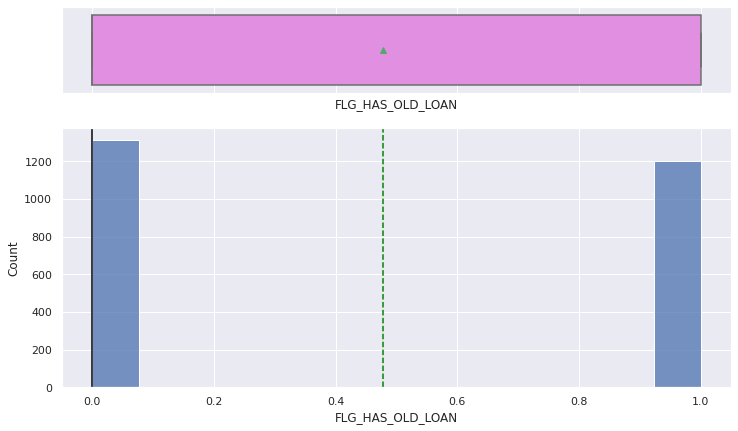

In [24]:
histogram_boxplot(data, "FLG_HAS_OLD_LOAN")

- There is no skewness present for having a old loan.

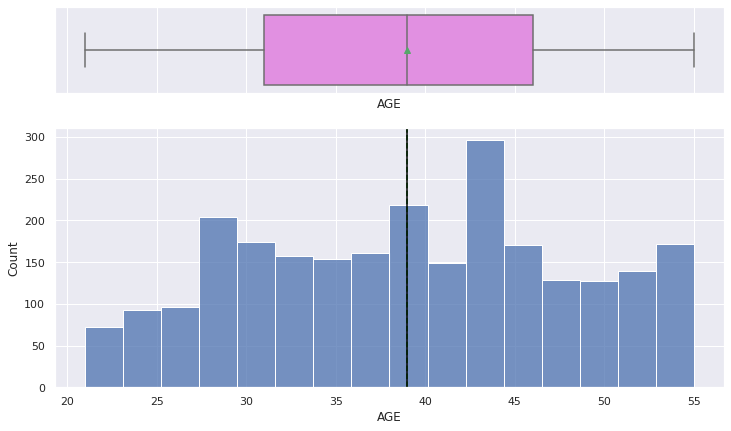

In [25]:
histogram_boxplot(data, "AGE")

- Age is evenly distributed.

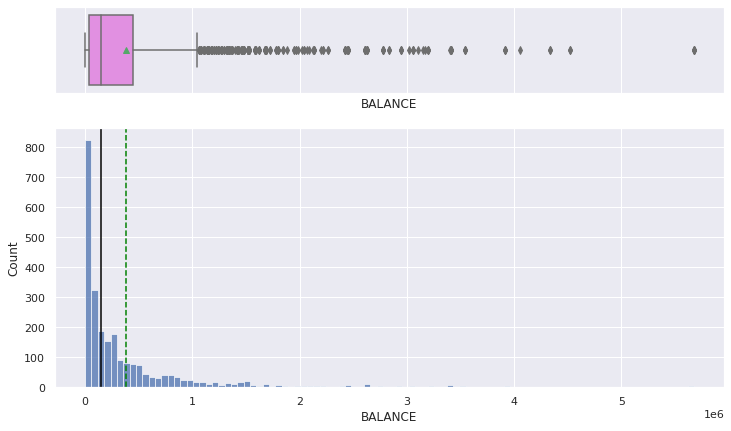

In [26]:
histogram_boxplot(data, "BALANCE")

- Balance is right skewed

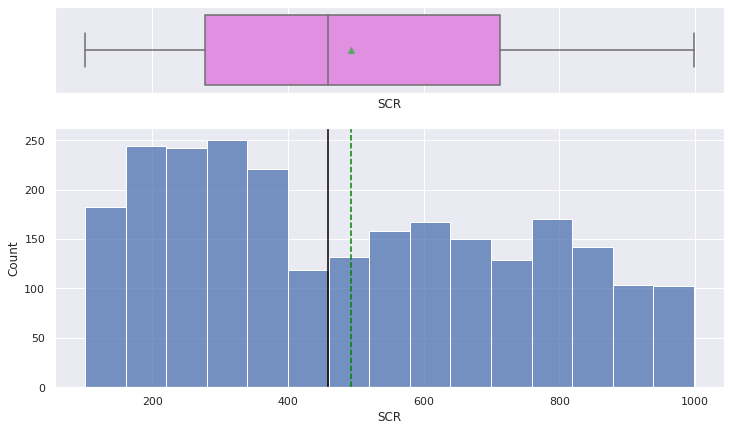

In [27]:
histogram_boxplot(data, "SCR")

- SCR is evenly distributed

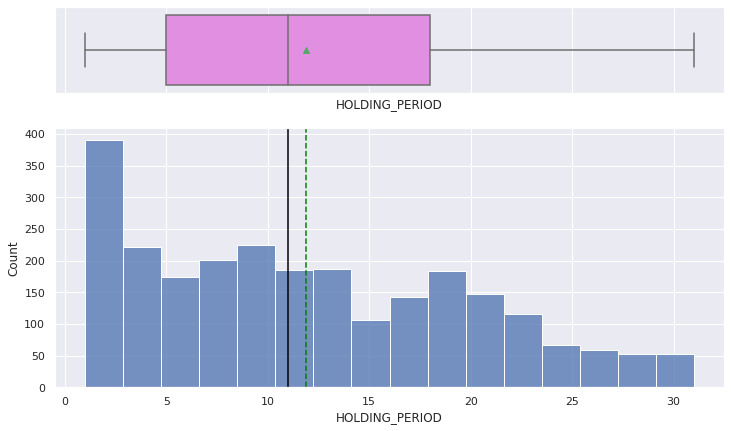

In [28]:
histogram_boxplot(data, "HOLDING_PERIOD")

- HOLDING_PERIOD is right skewed. 

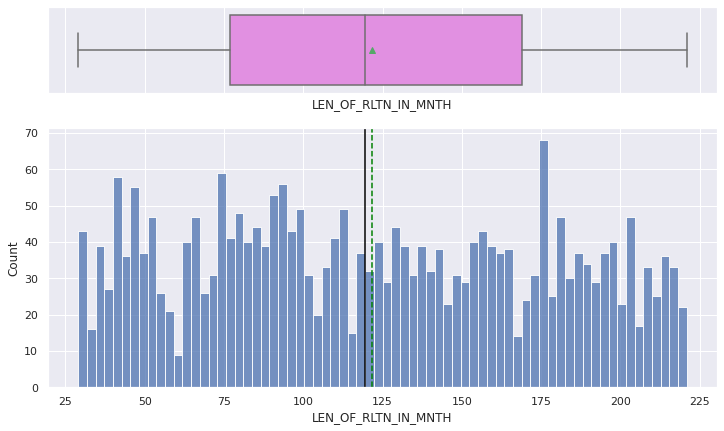

In [29]:
histogram_boxplot(data, "LEN_OF_RLTN_IN_MNTH", bins=70)

- Length of Relationship in Months is evenly distributed

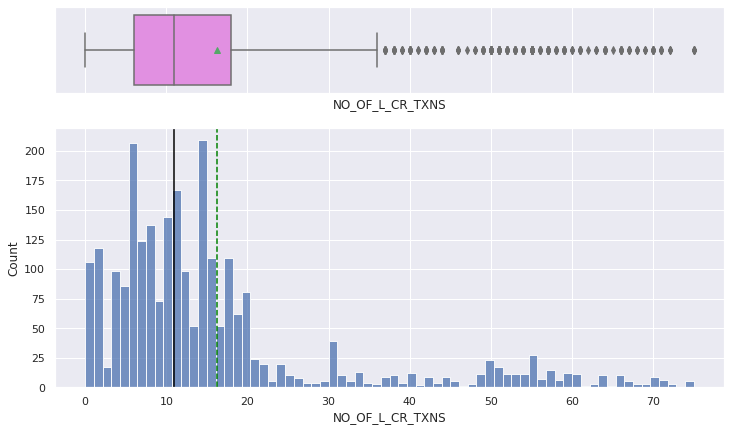

In [30]:
histogram_boxplot(data, "NO_OF_L_CR_TXNS", bins=70)

- Number of Credit Transactions is right-skewed. 

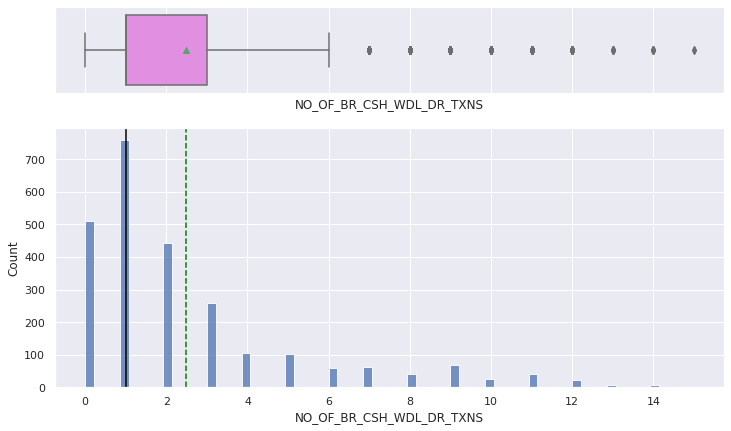

In [31]:
histogram_boxplot(data, "NO_OF_BR_CSH_WDL_DR_TXNS", bins=70)

- Amount cash withdrawn from Branch is right skewed.

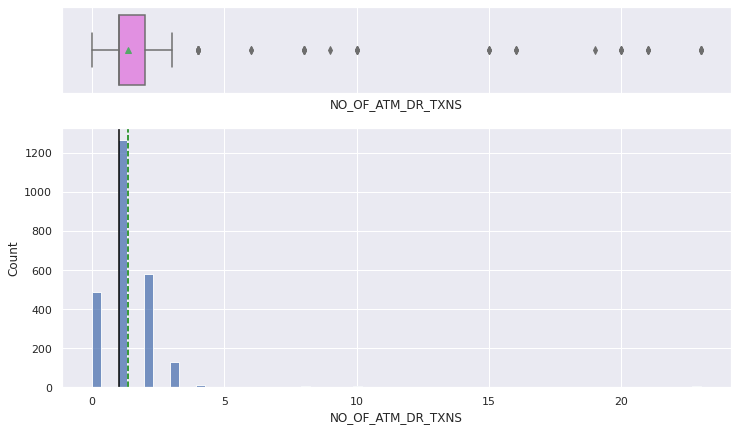

In [32]:
histogram_boxplot(data, "NO_OF_ATM_DR_TXNS", bins=70)

- Number of ATM Debit Transactions is right skewed. 

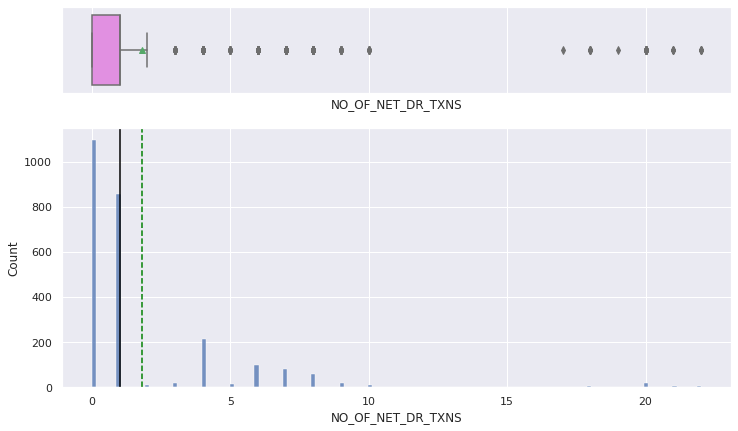

In [33]:
histogram_boxplot(data, "NO_OF_NET_DR_TXNS")

- Number of Net Banking Debit Transactions is right skewed.

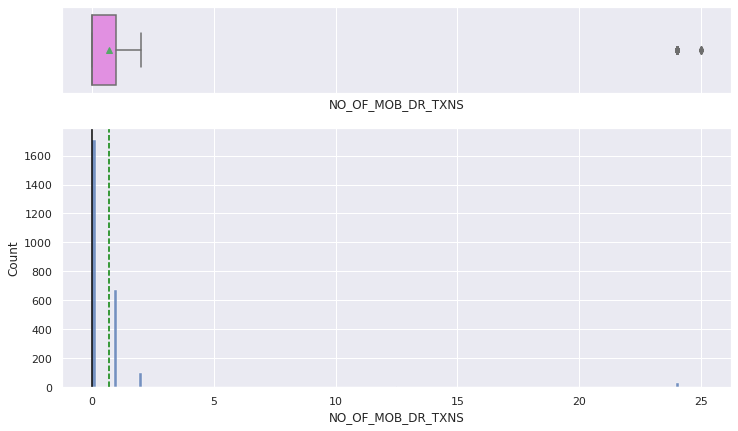

In [34]:
histogram_boxplot(data, "NO_OF_MOB_DR_TXNS")

- NO_OF_MOB_DR_TXNS is right skewed

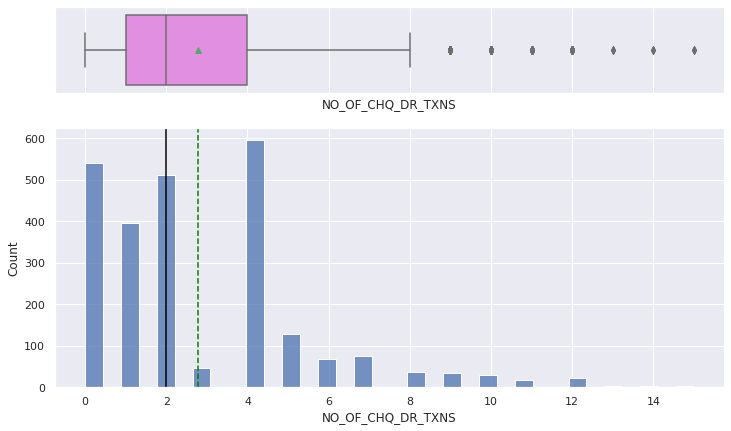

In [35]:
histogram_boxplot(data, "NO_OF_CHQ_DR_TXNS")

- NO_OF_CHQ_DR_TXNS is right skewed. 

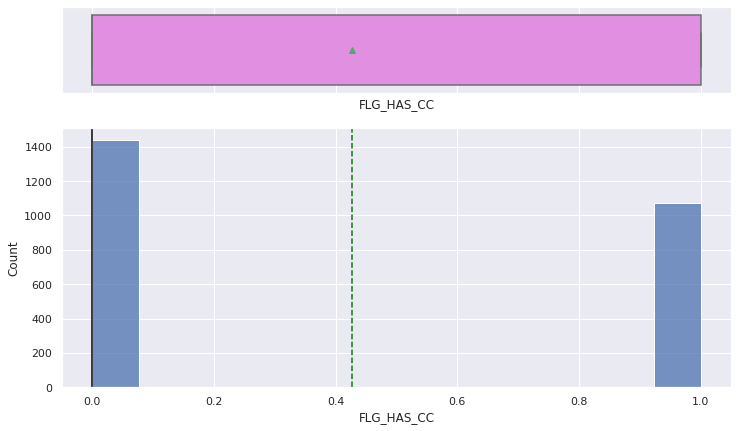

In [36]:
histogram_boxplot(data, "FLG_HAS_CC")

- FLG_HAS_CC is evenly distributed.

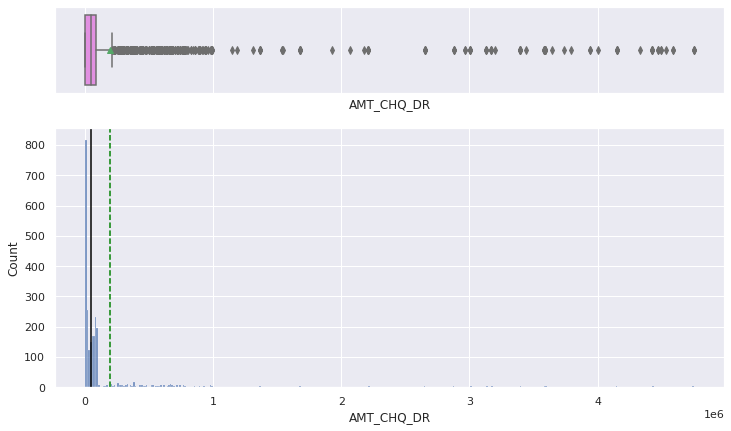

In [37]:
histogram_boxplot(data, "AMT_CHQ_DR")

- AMT_CHQ_DR is right skewed.

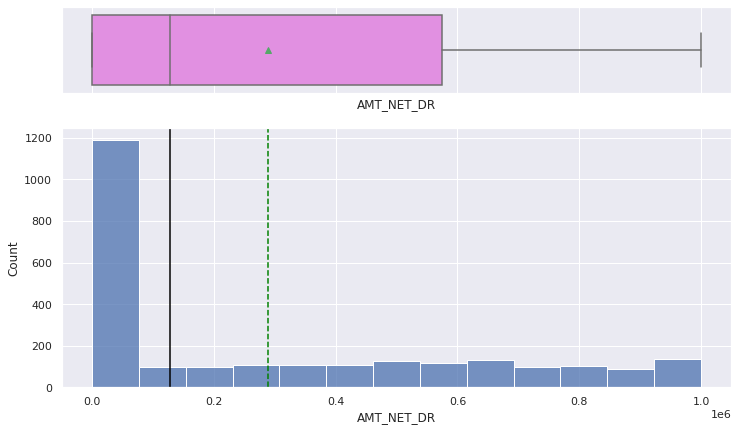

In [38]:
histogram_boxplot(data, "AMT_NET_DR")

- AMT_NET_DR is right skewed.

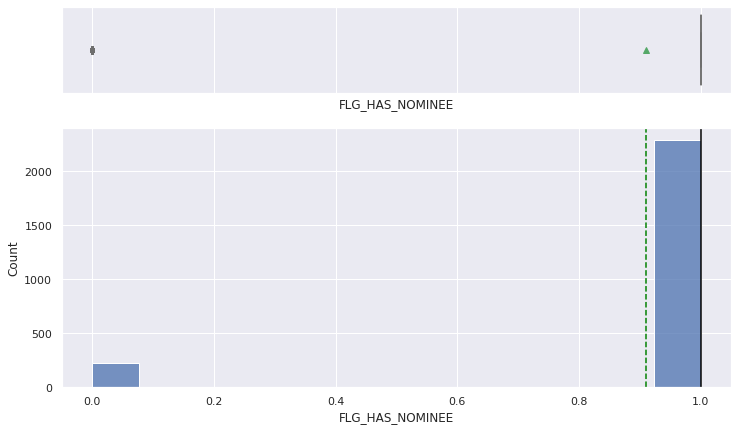

In [39]:
histogram_boxplot(data, "FLG_HAS_NOMINEE")

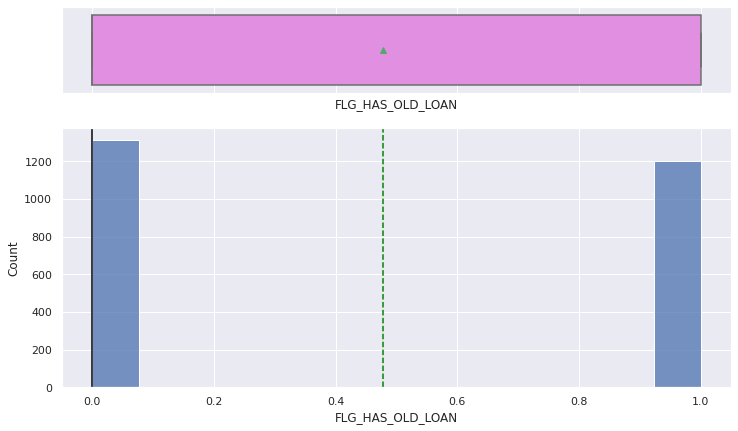

In [40]:
histogram_boxplot(data, "FLG_HAS_OLD_LOAN")

- FLG_HAS_OLD_LOAN is right skewed. 

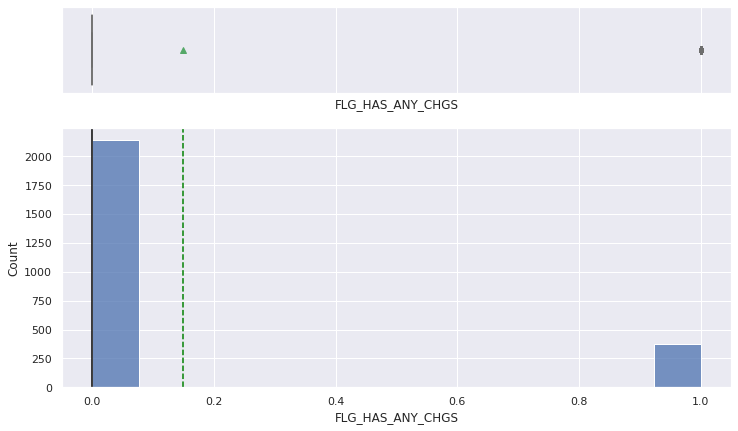

In [41]:
histogram_boxplot(data, "FLG_HAS_ANY_CHGS")

- FLG_HAS_ANY_CHGS is right skewed. 

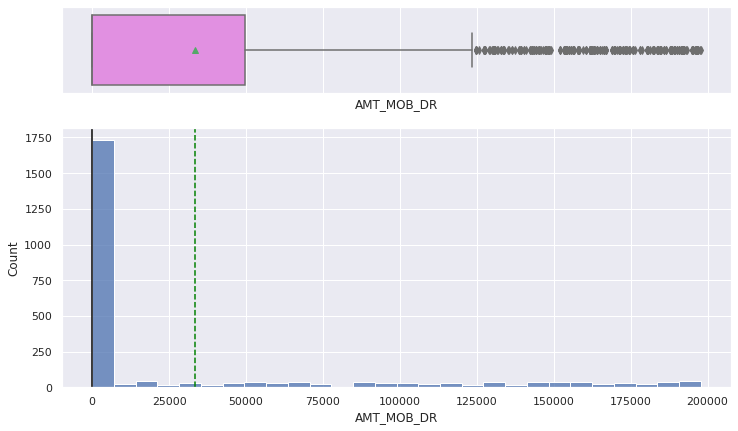

In [42]:
histogram_boxplot(data, "AMT_MOB_DR")

- AMT_MOB_DR is right skewed. 

### Bivariate Analysis

#### Heat Map:

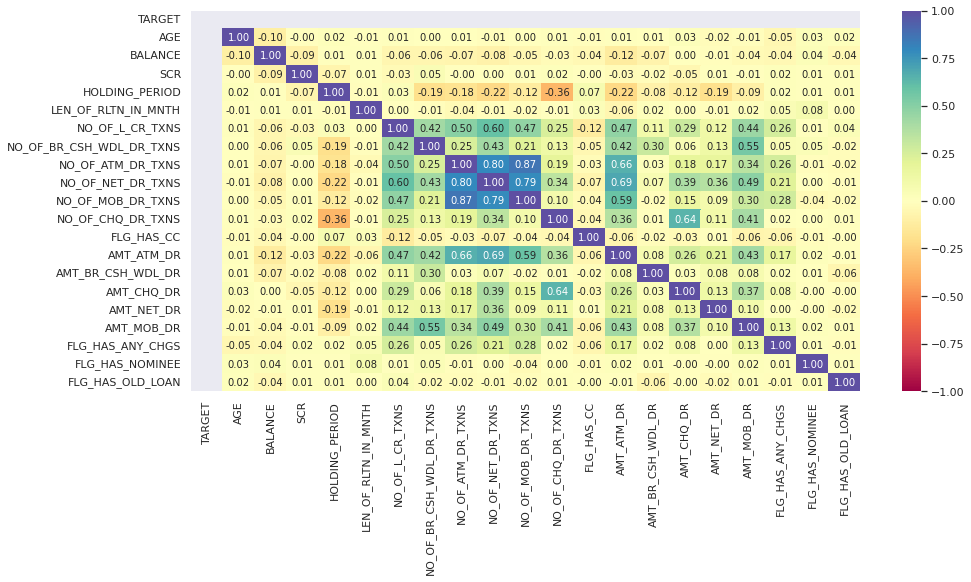

In [43]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Age has little effect on the other features.
- Balance has little effect on the other features.
- SCR has little effect on the other features.
- HOLDING_PERIOD has a weak effect with the other features.
- LEN_OF_RLTN_IN_MNTH has a weak effect with the other features.
- NO_OF_L_CR_TXNS has a strong positive relationship with NO_OF_BR_CSH_WDL_DR_TXNS, NO_OF_ATM_DR_TXNS, NO_OF_NET_DR_TXNS, and NO_OF_MOB_DR_TXNS

-  NO_OF_ATM_DR_TXNS has a almost perfect correlation with NO_OF_NET_DR_TXNS, and NO_OF_MOB_DR_TXNS

- NO_OF_MOB_DR_TXNS has a very strong relationship with NO_OF_NET_DR_TXNS
- NO_OF_CHQ_DR_TXNS has the most negative correlation with HOLDING_PERIOD



#### Distribution:
From notebook, Additional_CaseStudy_Logistic_AIML

In [45]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

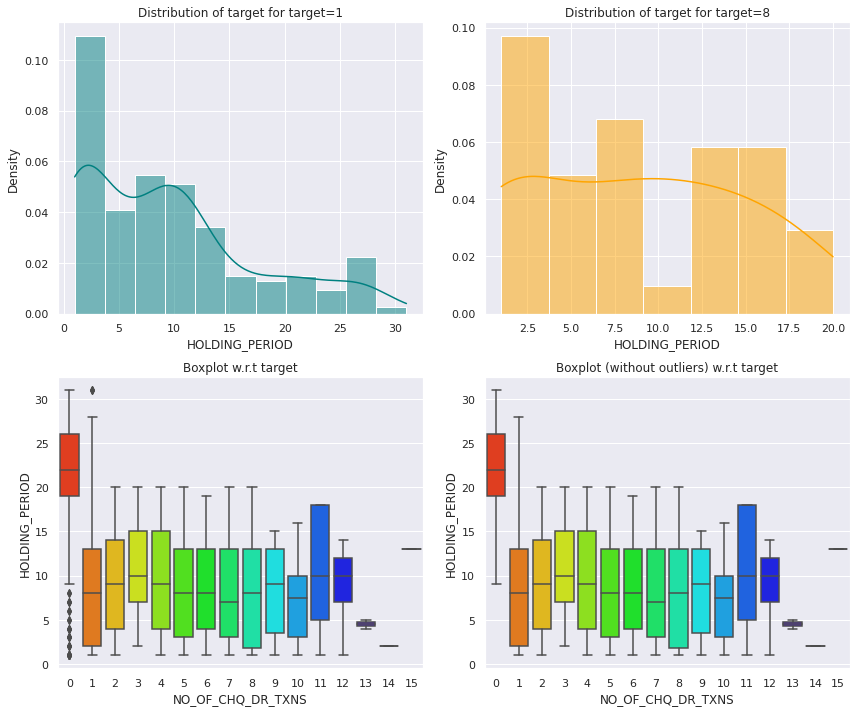

In [46]:
distribution_plot_wrt_target(data, "HOLDING_PERIOD", "NO_OF_CHQ_DR_TXNS")

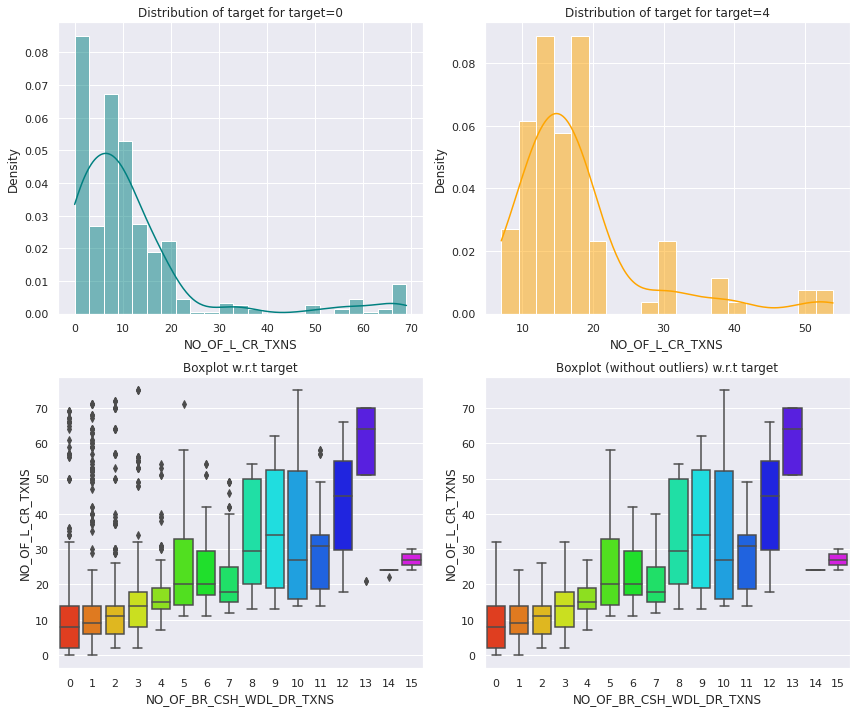

In [47]:
distribution_plot_wrt_target(data, "NO_OF_L_CR_TXNS", "NO_OF_BR_CSH_WDL_DR_TXNS")

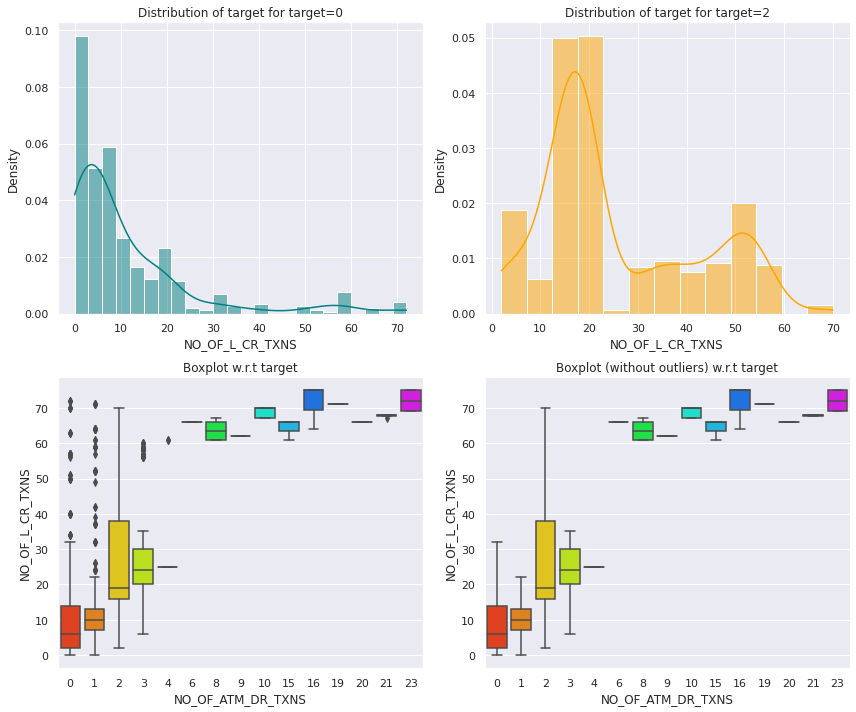

In [48]:
distribution_plot_wrt_target(data, "NO_OF_L_CR_TXNS", "NO_OF_ATM_DR_TXNS")

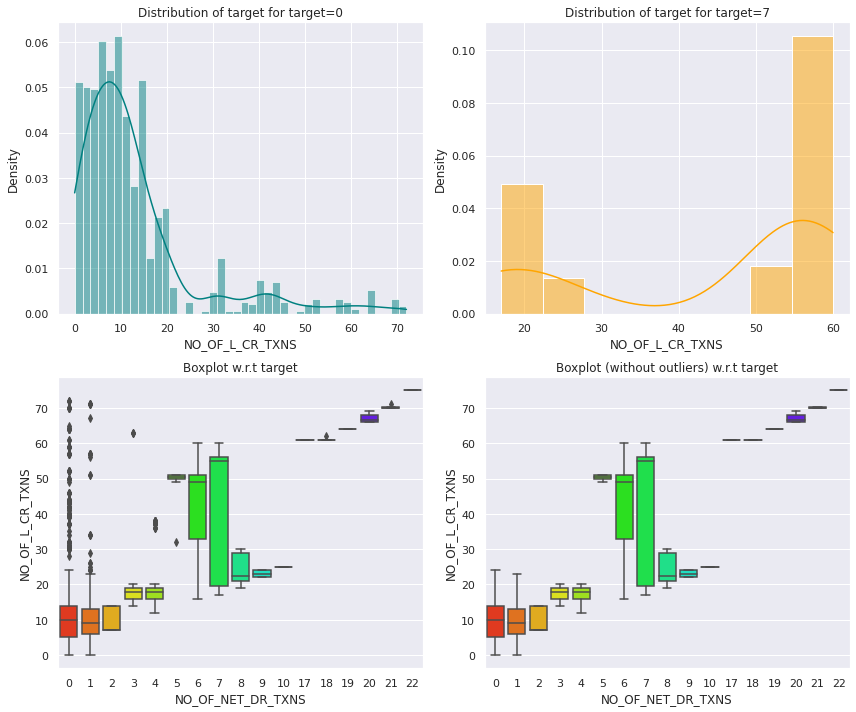

In [49]:
distribution_plot_wrt_target(data, "NO_OF_L_CR_TXNS", "NO_OF_NET_DR_TXNS")

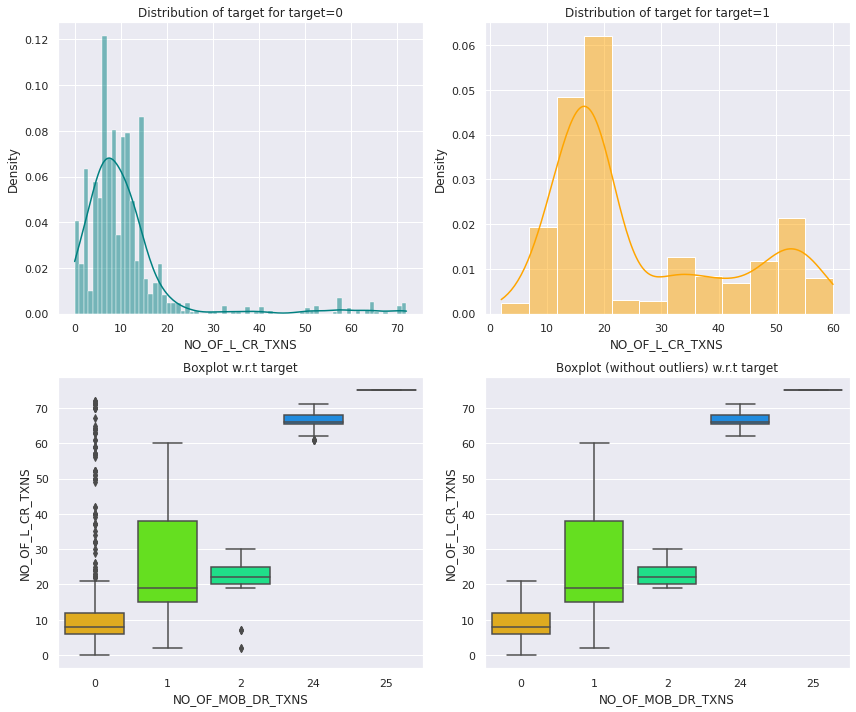

In [50]:
distribution_plot_wrt_target(data, "NO_OF_L_CR_TXNS", "NO_OF_MOB_DR_TXNS")

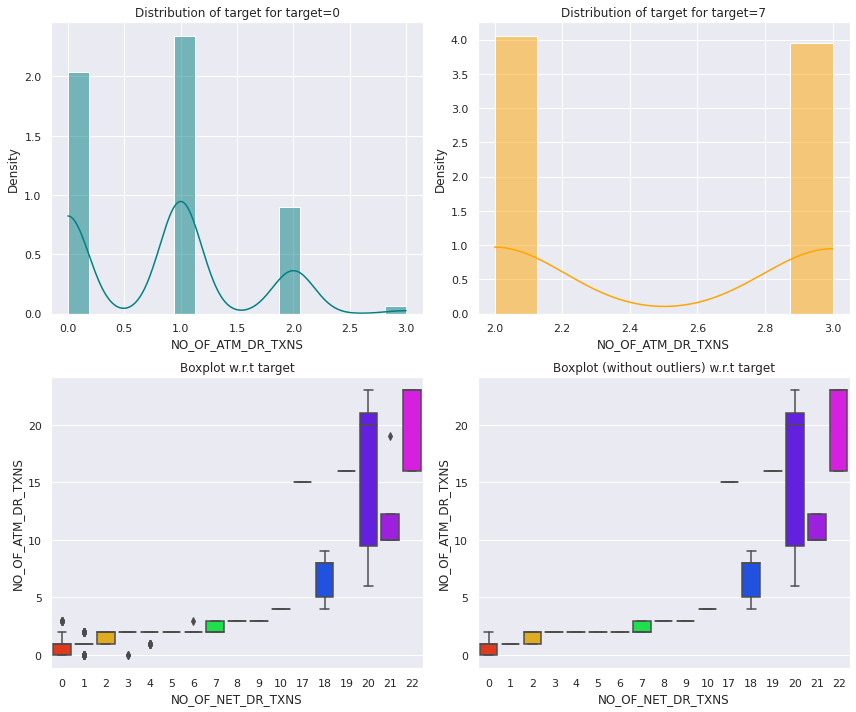

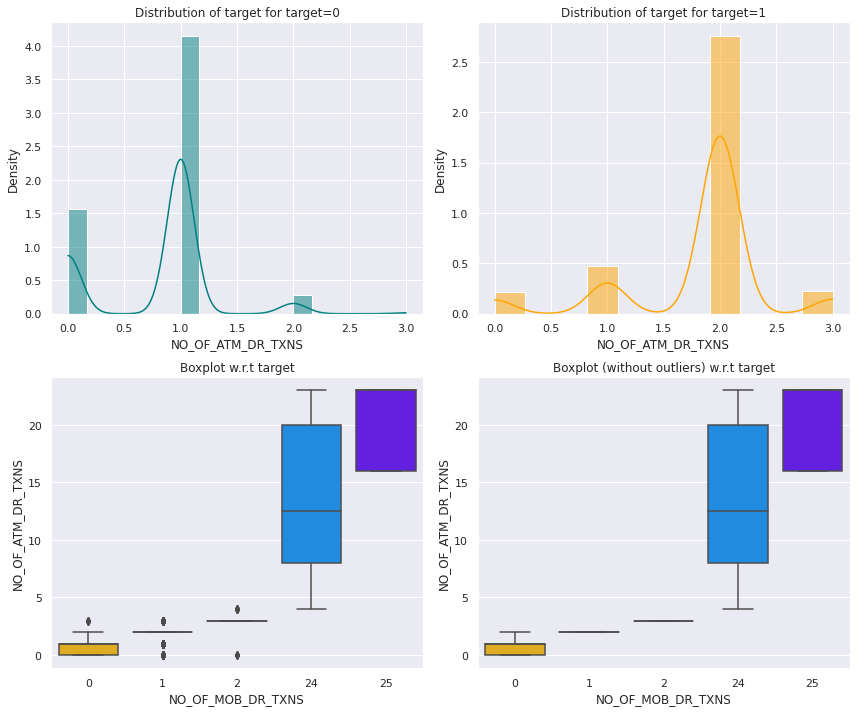

In [51]:
distribution_plot_wrt_target(data, "NO_OF_ATM_DR_TXNS", "NO_OF_NET_DR_TXNS")
distribution_plot_wrt_target(data, "NO_OF_ATM_DR_TXNS", "NO_OF_MOB_DR_TXNS")

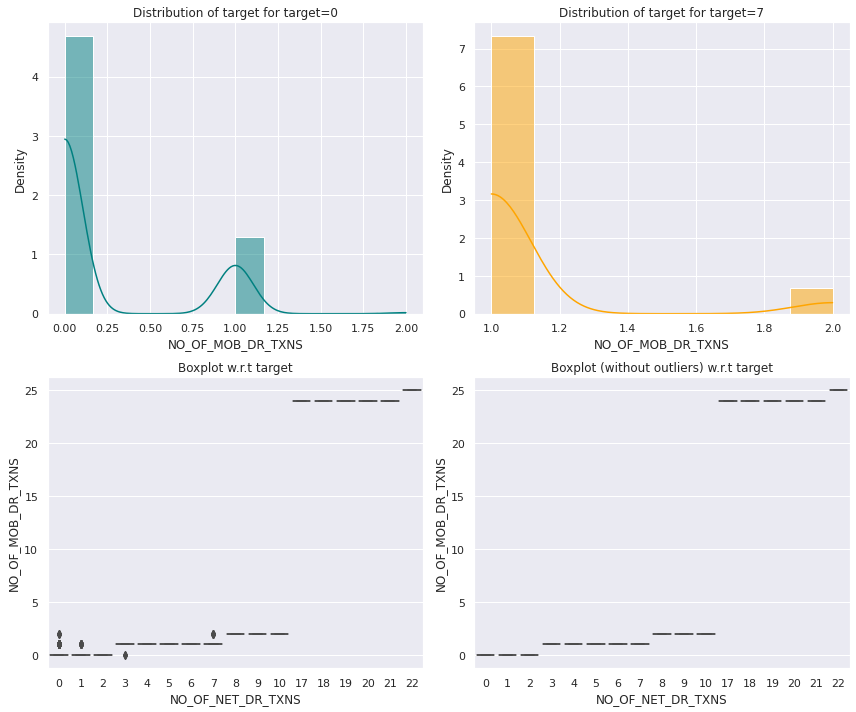

In [52]:
distribution_plot_wrt_target(data, "NO_OF_MOB_DR_TXNS", "NO_OF_NET_DR_TXNS")

# Summary of EDA:

### Data Description:

- There are 9649 values in the dataset, which were dropped.

- There are no missing values in the data.

- alot of the data-types are either int64 or float64. All floats where converted to int.
to int.

- 3 columns- "OCCUPATION", "ACC_TYPE", and "GENDER" are objects, and where converted to categories. 

### Observations from EDA:
- most of the features are right-skewed
- Age has little effect on the other features.
- Balance has little effect on the other features.
- SCR has little effect on the other features.
- HOLDING_PERIOD has a weak effect with the other features.
- LEN_OF_RLTN_IN_MNTH has a weak effect with the other features.
- NO_OF_L_CR_TXNS has a strong positive relationship with NO_OF_BR_CSH_WDL_DR_TXNS, NO_OF_ATM_DR_TXNS, NO_OF_NET_DR_TXNS, and NO_OF_MOB_DR_TXNS

- NO_OF_ATM_DR_TXNS has a almost perfect correlation with NO_OF_NET_DR_TXNS, and NO_OF_MOB_DR_TXNS

- NO_OF_MOB_DR_TXNS has a very strong relationship with NO_OF_NET_DR_TXNS
- NO_OF_CHQ_DR_TXNS has the most negative correlation with HOLDING_PERIOD



## Logistic Regression: Model Building

#### defining a function to plot the confusion_matrix of a classification model built using sklearn:


In [101]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, none, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target or none: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(none, pred)  # to compute Accuracy
    recall = recall_score(none, pred)  # to compute Recall
    precision = precision_score(none, pred)  # to compute Precision
    f1 = f1_score(none, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [102]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, none, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable 
    - target was switched with "none"
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(none, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Split Data:

In [80]:
X = data.drop(["SCR"], axis=1)
Y = data["SCR"]

In [81]:
# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [82]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (1758, 3534)
Shape of test set :  (754, 3534)
Percentage of classes in training set:
850    0.008532
280    0.008532
277    0.007395
119    0.006826
205    0.006826
         ...   
885    0.000569
540    0.000569
886    0.000569
583    0.000569
701    0.000569
Name: SCR, Length: 566, dtype: float64
Percentage of classes in test set:
277    0.011936
119    0.009284
850    0.007958
980    0.007958
234    0.007958
         ...   
371    0.001326
534    0.001326
820    0.001326
528    0.001326
958    0.001326
Name: SCR, Length: 414, dtype: float64


#### Logistic Regression


In [84]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

model = LogisticRegression(random_state=1)
lg = model.fit(X_train, y_train)

#### Coefficients:

In [85]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

TARGET           AGE   BALANCE  HOLDING_PERIOD  \
coef -2.085658e-10 -4.307906e-09  0.000015   -2.578726e-09   

      LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  NO_OF_BR_CSH_WDL_DR_TXNS  \
coef        -4.032998e-08    -3.503558e-09             -1.926908e-10   

      NO_OF_ATM_DR_TXNS  NO_OF_NET_DR_TXNS  NO_OF_MOB_DR_TXNS  \
coef      -1.999508e-10      -1.678873e-10      -1.554078e-10   

      NO_OF_CHQ_DR_TXNS    FLG_HAS_CC  AMT_ATM_DR  AMT_BR_CSH_WDL_DR  \
coef      -6.250758e-10 -2.004357e-10   -0.000003           0.000006   

      AMT_CHQ_DR  AMT_NET_DR  AMT_MOB_DR  FLG_HAS_ANY_CHGS  FLG_HAS_NOMINEE  \
coef    -0.00002    0.000009   -0.000008     -7.154009e-11    -4.269561e-10   

      FLG_HAS_OLD_LOAN  CUST_ID_C12211  CUST_ID_C12212  CUST_ID_C12213  \
coef     -2.278835e-10             0.0             0.0   -6.927431e-13   

      CUST_ID_C12214  CUST_ID_C12215  CUST_ID_C12216  CUST_ID_C12217  \
coef   -4.738170e-13   -2.938184e-13   -1.557575e-13   -3.328732e-14   

      CUST_ID_C12218  CUST_ID_C12219  CUST_ID_C12220  CUST_ID_C12221  \
coef   -2.992500e-14   -2.992500e-14   -3.652502e-13             0.0   

      CUST_ID_C12222  CUST_ID_C12223  CUST_ID_C12224  CUST_ID_C12225  \
coef   -2.750550e-13   -4.008949e-13   -2.127252e-13             0.0   

      CUST_ID_C12226  CUST_ID_C12227  CUST_ID_C12228  CUST_ID_C12229  \
coef             0.0   -4.394600e-13   -7.105685e-14   -4.826270e-13   

      CUST_ID_C12230  CUST_ID_C12231  CUST_ID_C12232  CUST_ID_C12233  \
coef             0.0             0.0             0.0   -1.125137e-13   

      CUST_ID_C12234  CUST_ID_C12235  CUST_ID_C12236  CUST_ID_C12237  \
coef   -4.120505e-13   -8.826964e-13   -3.456278e-14             0.0   

      CUST_ID_C12238  CUST_ID_C12239  CUST_ID_C12240  CUST_ID_C12241  \
coef   -6.957293e-13             0.0   -1.658313e-13   -5.283639e-13   

      CUST_ID_C12242  CUST_ID_C12243  CUST_ID_C12244  CUST_ID_C12245  \
coef             0.0             0.0   -8.976131e-14   -7.685649e-13   

      CUST_ID_C12246  CUST_ID_C12247  CUST_ID_C12248  CUST_ID_C12249  \
coef   -3.107774e-13   -5.681581e-13   -3.276543e-13   -5.522919e-14   

      CUST_ID_C12250  CUST_ID_C12251  CUST_ID_C12252  CUST_ID_C12253  \
coef   -1.811969e-13   -9.934293e-14   -4.038255e-13   -2.705130e-14   

      CUST_ID_C12254  CUST_ID_C12255  CUST_ID_C12256  CUST_ID_C12257  \
coef             0.0   -3.406389e-14   -3.714495e-14   -9.588756e-13   

      CUST_ID_C12258  CUST_ID_C12259  CUST_ID_C12260  CUST_ID_C12261  \
coef   -2.466956e-13   -2.346568e-13   -3.161086e-13   -1.187612e-13   

      CUST_ID_C12262  CUST_ID_C12263  CUST_ID_C12264  CUST_ID_C12265  \
coef             0.0             0.0             0.0             0.0   

      CUST_ID_C12266  CUST_ID_C12267  CUST_ID_C12268  CUST_ID_C12269  \
coef   -6.550532e-13   -6.665230e-13   -2.078329e-14             0.0   

      CUST_ID_C12270  CUST_ID_C12271  CUST_ID_C12272  CUST_ID_C12273  \
coef   -3.158339e-13             0.0   -2.127252e-13   -3.367683e-13   

      CUST_ID_C12274  CUST_ID_C12275  CUST_ID_C12276  CUST_ID_C12277  \
coef   -2.109172e-13   -4.637468e-13   -2.098988e-13   -3.846981e-13   

      CUST_ID_C12278  CUST_ID_C12279  CUST_ID_C12280  CUST_ID_C12281  \
coef   -3.968097e-13   -2.360646e-14             0.0   -2.930929e-13   

      CUST_ID_C12282  CUST_ID_C12283  CUST_ID_C12284  CUST_ID_C12285  \
coef             0.0   -2.583210e-13   -1.657358e-13   -3.776529e-13   

      CUST_ID_C12286  CUST_ID_C12287  CUST_ID_C12288  CUST_ID_C12289  \
coef             0.0   -3.107774e-13   -3.696145e-13   -3.392469e-13   

      CUST_ID_C12290  CUST_ID_C12291  CUST_ID_C12292  CUST_ID_C12293  \
coef   -4.984246e-14             0.0   -1.444429e-13   -2.938184e-13   

      CUST_ID_C12294  CUST_ID_C12295  CUST_ID_C12296  CUST_ID_C12297  \
coef   -4.738170e-13   -1.028652e-13   -2.846476e-13   -3.426891e-14   

      CUST_ID_C12298  CUST_ID_C12299  CUST_ID_C12300  CUST_ID_C12301  \
coef   -4.038255e-13   -2.703614e-13     

Coefficients of Age, SCR, NO_OF_L_CR_TXNS,NO_OF_MOB_DR_TXNS, NO_OF_CHQ_DR_TXNS,	FLG_HAS_CC, and FLG_HAS_NOMINEE are positive, an increase in these will lead to an increase in chances of a customer buying a loan.
****
Coefficients of Balance, Holding Period, LEN_OF_RLTN_IN_MNTH, NO_OF_L_CR_TXNS,
NO_OF_ATM_DR_TXNS, NO_OF_NET_DR_TXNS,AMT_ATM_DR	AMT_BR_CSH_WDL_DR	AMT_CHQ_DR	AMT_NET_DR, FLG_HAS_ANY_CHGSare negative, an increase in these will lead to a decrease in chances of a customer buying a loan.

###  Converting coefficients to odds

**Odds from coefficients**

In [61]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

TARGET           AGE   BALANCE  HOLDING_PERIOD  \
Odds         1.000000e+00  1.000000e+00  1.000015    1.000000e+00   
Change_odd% -2.085657e-08 -4.307906e-07  0.001518   -2.578726e-07   

             LEN_OF_RLTN_IN_MNTH  NO_OF_L_CR_TXNS  NO_OF_BR_CSH_WDL_DR_TXNS  \
Odds                    1.000000     1.000000e+00              1.000000e+00   
Change_odd%            -0.000004    -3.503558e-07             -1.926908e-08   

             NO_OF_ATM_DR_TXNS  NO_OF_NET_DR_TXNS  NO_OF_MOB_DR_TXNS  \
Odds              1.000000e+00       1.000000e+00       1.000000e+00   
Change_odd%      -1.999508e-08      -1.678873e-08      -1.554078e-08   

             NO_OF_CHQ_DR_TXNS    FLG_HAS_CC  AMT_ATM_DR  AMT_BR_CSH_WDL_DR  \
Odds              1.000000e+00  1.000000e+00    0.999997           1.000006   
Change_odd%      -6.250759e-08 -2.004357e-08   -0.000274           0.000555   

             AMT_CHQ_DR  AMT_NET_DR  AMT_MOB_DR  FLG_HAS_ANY_CHGS  \
Odds           0.999980    1.000009    0.999992      1.000000e+00   
Change_odd%   -0.002009    0.000891   -0.000777     -7.154011e-09   

             FLG_HAS_NOMINEE  FLG_HAS_OLD_LOAN  CUST_ID_C12211  \
Odds            1.000000e+00      1.000000e+00             1.0   
Change_odd%    -4.269560e-08     -2.278835e-08             0.0   

             CUST_ID_C12212  CUST_ID_C12213  CUST_ID_C12214  CUST_ID_C12215  \
Odds                    1.0    1.000000e+00    1.000000e+00    1.000000e+00   
Change_odd%             0.0   -6.927792e-11   -4.738432e-11   -2.937650e-11   

             CUST_ID_C12216  CUST_ID_C12217  CUST_ID_C12218  CUST_ID_C12219  \
Odds           1.000000e+00    1.000000e+00    1.000000e+00    1.000000e+00   
Change_odd%   -1.557643e-11   -3.330669e-12   -2.997602e-12   -2.997602e-12   

             CUST_ID_C12220  CUST_ID_C12221  CUST_ID_C12222  CUST_ID_C12223  \
Odds           1.000000e+00             1.0    1.000000e+00    1.000000e+00   
Change_odd%   -3.652634e-11             0.0   -2.750022e-11   -4.009015e-11   

             CUST_ID_C12224  CUST_ID_C12225  CUST_ID_C12226  CUST_ID_C12227  \
Odds           1.000000e+00             1.0             1.0    1.000000e+00   
Change_odd%   -2.127187e-11             0.0             0.0   -4.394263e-11   

             CUST_ID_C12228  CUST_ID_C12229  CUST_ID_C12230  CUST_ID_C12231  \
Odds           1.000000e+00    1.000000e+00             1.0             1.0   
Change_odd%   -7.105427e-12   -4.826139e-11             0.0             0.0   

             CUST_ID_C12232  CUST_ID_C12233  CUST_ID_C12234  CUST_ID_C12235  \
Odds                    1.0    1.000000e+00    1.000000e+00    1.000000e+00   
Change_odd%             0.0   -1.124656e-11   -4.120038e-11   -8.827383e-11   

             CUST_ID_C12236  CUST_ID_C12237  CUST_ID_C12238  CUST_ID_C12239  \
Odds           1.000000e+00             1.0    1.000000e+00             1.0   
Change_odd%   -3.452794e-12             0.0   -6.957768e-11             0.0   

             CUST_ID_C12240  CUST_ID_C12241  CUST_ID_C12242  CUST_ID_C12243  \
Odds           1.000000e+00    1.000000e+00             1.0             1.0   
Change_odd%   -1.658673e-11   -5.283551e-11             0.0             0.0   

             CUST_ID_C12244  CUST_ID_C12245  CUST_ID_C12246  CUST_ID_C12247  \
Odds           1.000000e+00    1.000000e+00    1.000000e+00    1.000000e+00   
Change_odd%   -8.970602e-12   -7.686074e-11   -3.107514e-11   -5.682121e-11   

             CUST_ID_C12248  CUST_ID_C12249  CUST_ID_C12250  CUST_ID_C12251  \
Odds           1.000000e+00    1.000000e+00    1.000000e+00    1.000000e+00   
Change_odd%   -3.276268e-11   -5.517808e-12   -1.811884e-11   -9.936496e-12   

             CUST_ID_C12252  CUST_ID_C12253  CUST_ID_C12254  CUST_ID_C12255  \
Odds           1.000000e+00    1.000000e+00             1.0    1.000000e+00   
Change_odd%   -4.037881e-11   -2.708944e-12             0.0   -3.408385e-12   

             CUST_ID_C12256  CUST_ID_C12257  CUST_ID_C12258  CUST_ID_C12259  \
Odds          

#### Coefficient interpretations:
- FLG_HAS_ANY_CHGS: Holding all other features constant a unit change in FLG_HAS_ANY_CHGS will decrease the odds of a customer buying a loan by 0.99 times or a 7.17% decrease in the odds.
- NO_OF_CHQ_DR_TXNS: Holding all other features constant a unit change in NO_OF_CHQ_DR_TXNS will decrease the odds of a customer buying a loan by 0.99 times or a 6.25% decrease in the odds.


### Logistic Regression: Model Performance 


In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [86]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

ValueError: ignored

#### ROC-AUC

In [87]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

ValueError: ignored

-

### Logistic Regression Improvement

* Let's see if the recall score can be improved

### Optimal threshold using AUC-ROC curve

In [99]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

ValueError: ignored

#### Checking model performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

#### Let's use Precision-Recall curve and see if we can find a better threshold

In [ ]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# setting the threshold
optimal_threshold_curve =0.47

#### Checking Logistic Regression model performance on training set

In [ ]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

## Decision Tree: Model Building

In [ ]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

In [144]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [145]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

In [146]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [147]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

### Decision Tree: Model Performance 

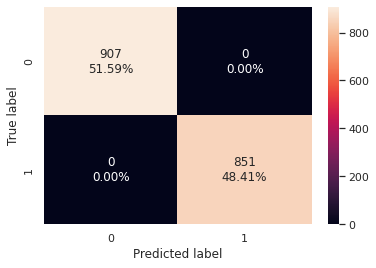

In [148]:
confusion_matrix_sklearn(model, X_train, y_train)

In [149]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


#### Checking model performance on test set

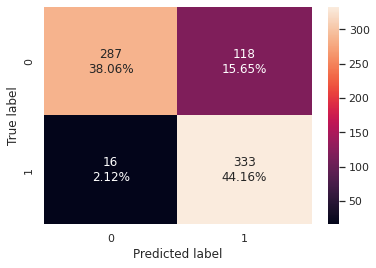

In [150]:
confusion_matrix_sklearn(model, X_test, y_test)

In [151]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.9541547277936963


## Visualizing the 1st Decision Tree

In [152]:
## creating a list of column names
feature_names = X_train.columns.to_list()

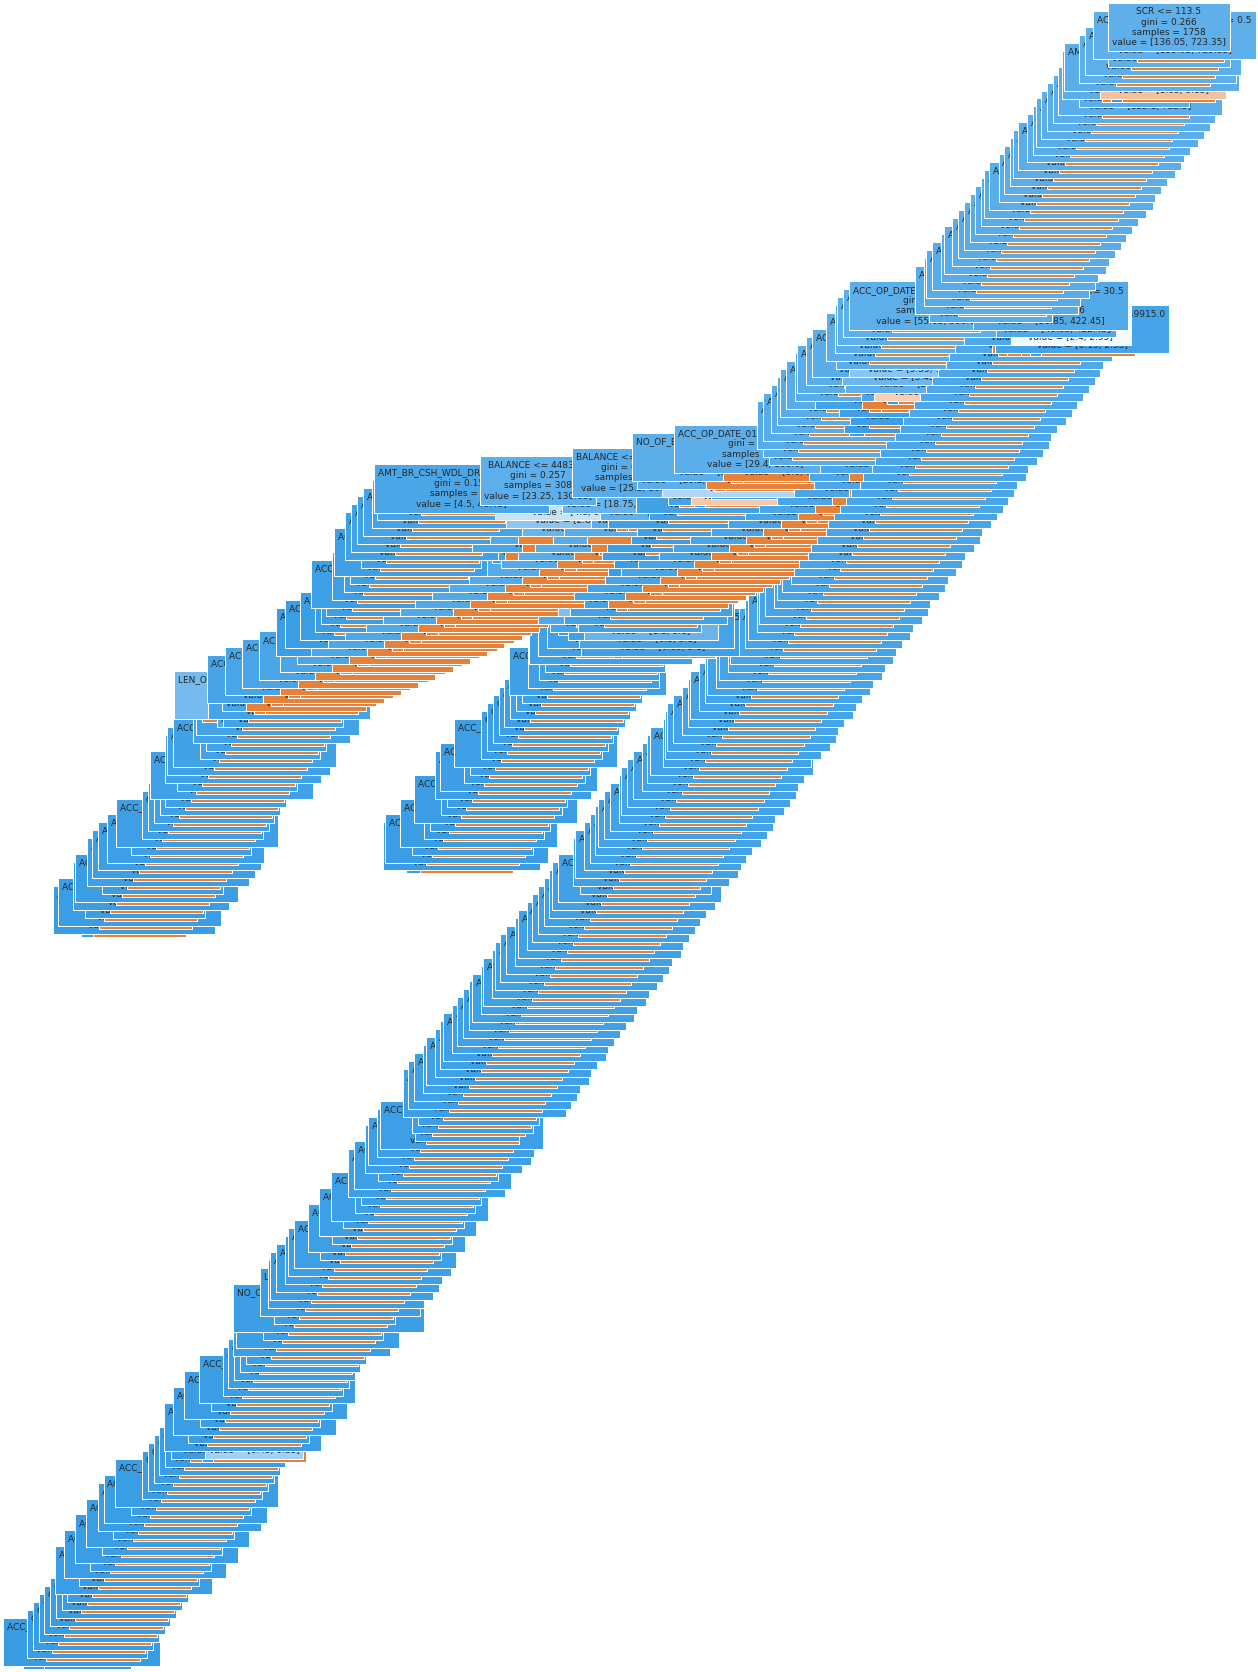

In [153]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [154]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- SCR <= 113.50
|   |--- weights: [2.40, 0.00] class: 0
|--- SCR >  113.50
|   |--- ACC_OP_DATE_12/17/2007 <= 0.50
|   |   |--- SCR <= 991.50
|   |   |   |--- ACC_OP_DATE_5/19/2006 <= 0.50
|   |   |   |   |--- ACC_OP_DATE_1/28/2009 <= 0.50
|   |   |   |   |   |--- AMT_BR_CSH_WDL_DR <= 994705.00
|   |   |   |   |   |   |--- ACC_OP_DATE_9/17/2001 <= 0.50
|   |   |   |   |   |   |   |--- BALANCE <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |   |--- BALANCE >  2.50
|   |   |   |   |   |   |   |   |--- ACC_OP_DATE_03-08-2010 <= 0.50
|   |   |   |   |   |   |   |   |   |--- ACC_OP_DATE_10/24/2002 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- ACC_OP_DATE_10/28/2002 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 194
|   |   |   |   |   |   |   |   |   |   |--- ACC_OP_DATE_10/28/2002 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |

In [155]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                            Imp
SCR                    0.044572
BALANCE                0.040110
LEN_OF_RLTN_IN_MNTH    0.032454
AMT_BR_CSH_WDL_DR      0.024931
AMT_CHQ_DR             0.018137
...                         ...
CUST_ID_C13386         0.000000
CUST_ID_C13387         0.000000
CUST_ID_C13389         0.000000
CUST_ID_C13390         0.000000
ACC_OP_DATE_9/30/2012  0.000000

[3534 rows x 1 columns]


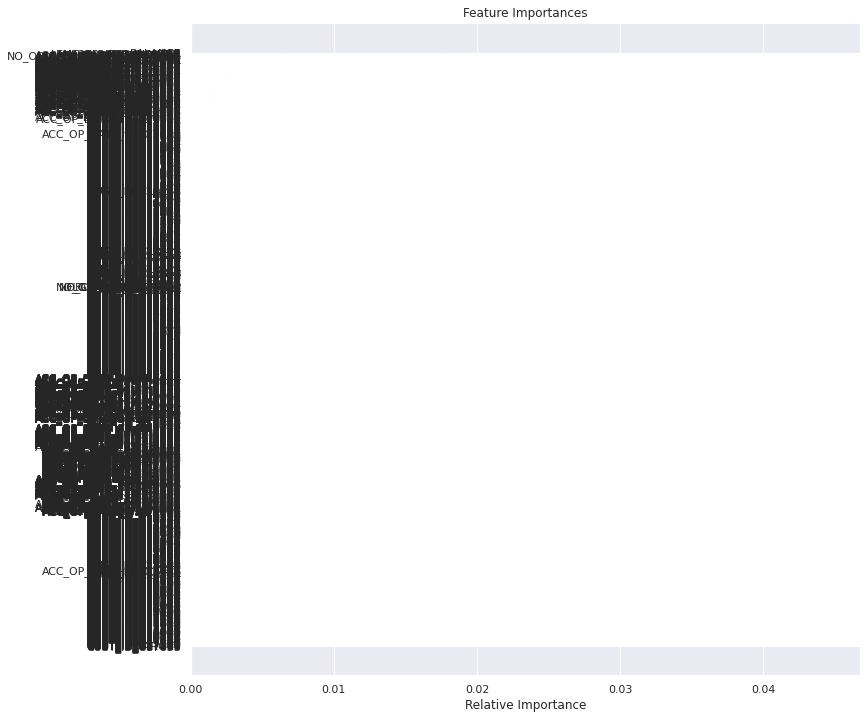

In [156]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Improvement

### Reducing over fitting

In [157]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=5, min_impurity_decrease=0.01, random_state=1)

#### Checking performance on Decision Tree training set

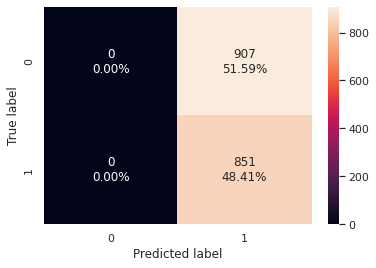

In [158]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [159]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 1.0


#### Checking performance on test set

In [160]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 1.0


## Visualizing the 2nd Decision Tree

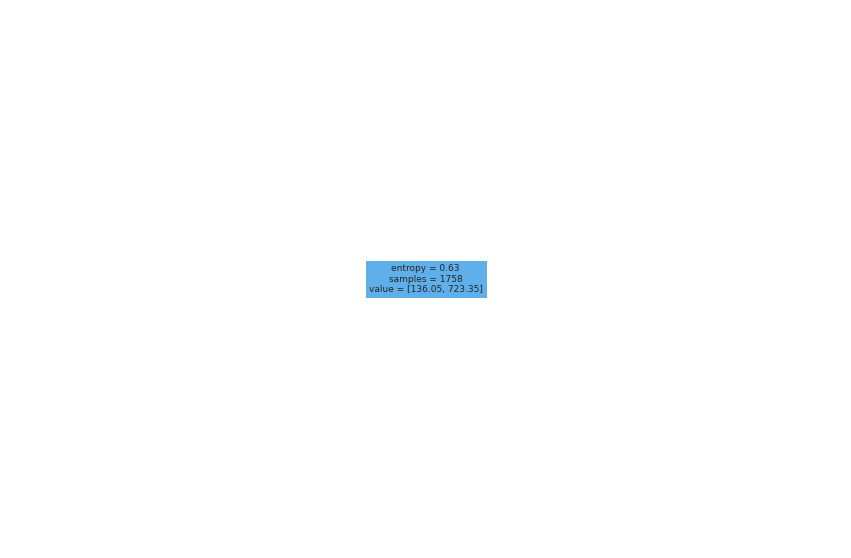

In [161]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [162]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- weights: [136.05, 723.35] class: 1



Observation:

In [163]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                       Imp
TARGET                 0.0
CUST_ID_C18900         0.0
CUST_ID_C18837         0.0
CUST_ID_C18854         0.0
CUST_ID_C18857         0.0
...                    ...
CUST_ID_C13372         0.0
CUST_ID_C13373         0.0
CUST_ID_C13374         0.0
CUST_ID_C13375         0.0
ACC_OP_DATE_9/30/2012  0.0

[3534 rows x 1 columns]


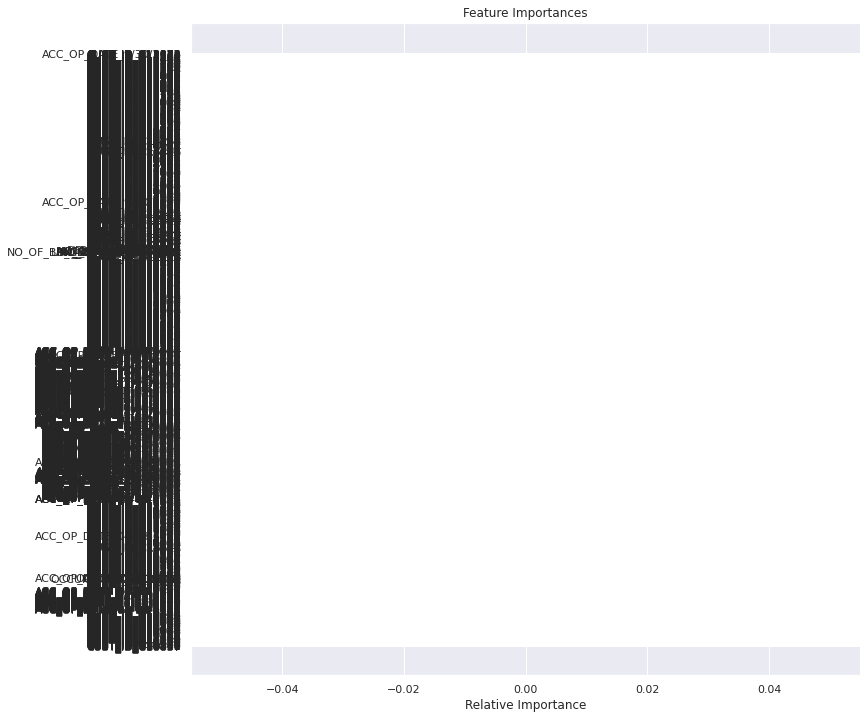

In [164]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Cost Complexity Pruning

In [166]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [167]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-2.907696e-14
1,1.550230e-18,-2.907541e-14
2,1.550230e-18,-2.907386e-14
3,1.666497e-18,-2.907219e-14
4,3.332994e-18,-2.906886e-14
5,4.069354e-18,-2.906479e-14
6,4.844469e-18,-2.905995e-14
7,2.480368e-17,-2.903514e-14
8,2.480368e-17,-2.901034e-14
9,2.480368e-17,-2.898553e-14


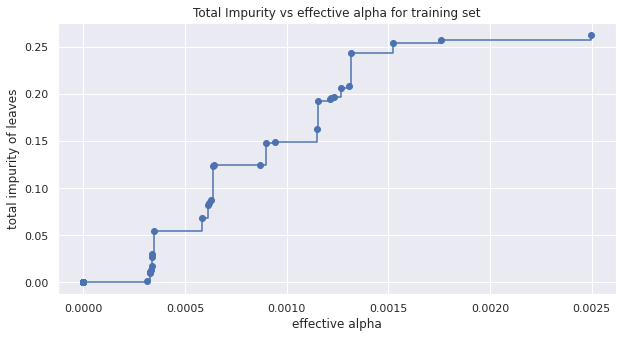

In [168]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

#### Decicion Tree with Alphas

In [169]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0039679545442214414


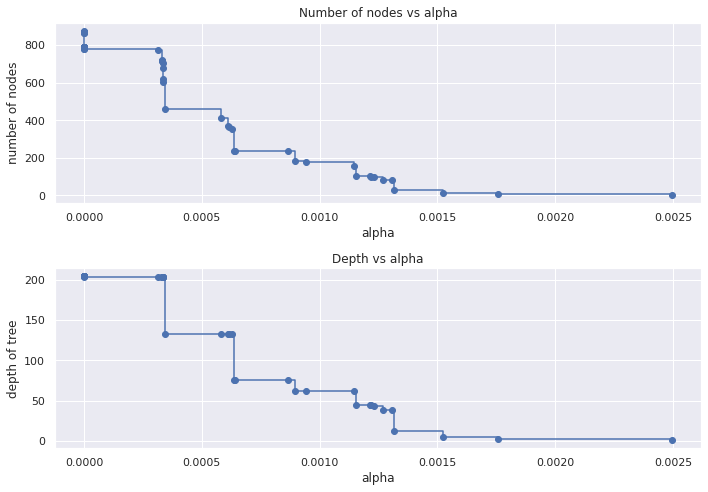

In [170]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

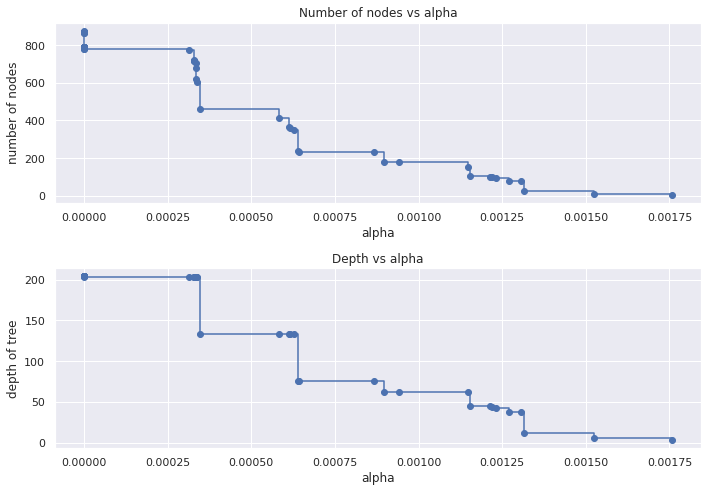

In [171]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [172]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [173]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [174]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

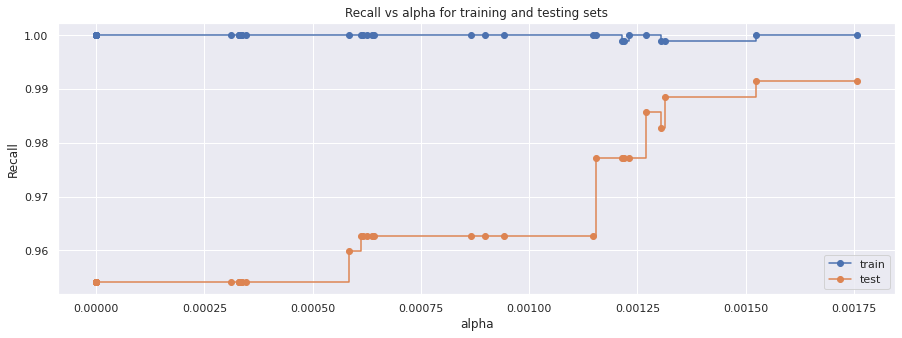

In [175]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [188]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0015232822138746707,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [189]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0015232822138746707,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

Observation on Recall 

In [176]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0015232822138746707,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [177]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0015232822138746707,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [178]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 1.0


#### checking performance on test set

In [179]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9914040114613181


#### checking performance on training set

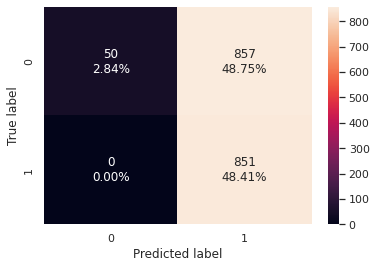

In [180]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [190]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

NameError: ignored

### Visualizing the 3rd Decision Tree

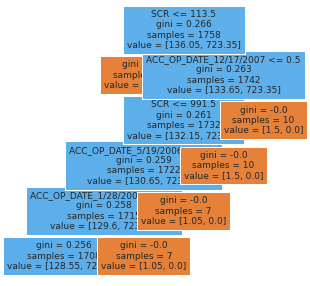

In [181]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [191]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

#### Checking performance on the training set

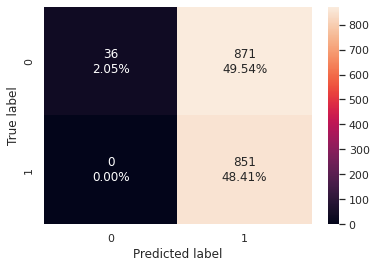

In [193]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [194]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 1.0


#### Checking performance on the test set

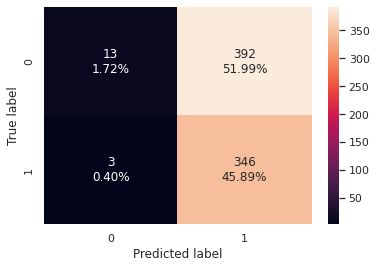

In [195]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [196]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9914040114613181


Visualizing the Decision Tree

In [197]:
## creating a list of column names
feature_names = X_train.columns.to_list()

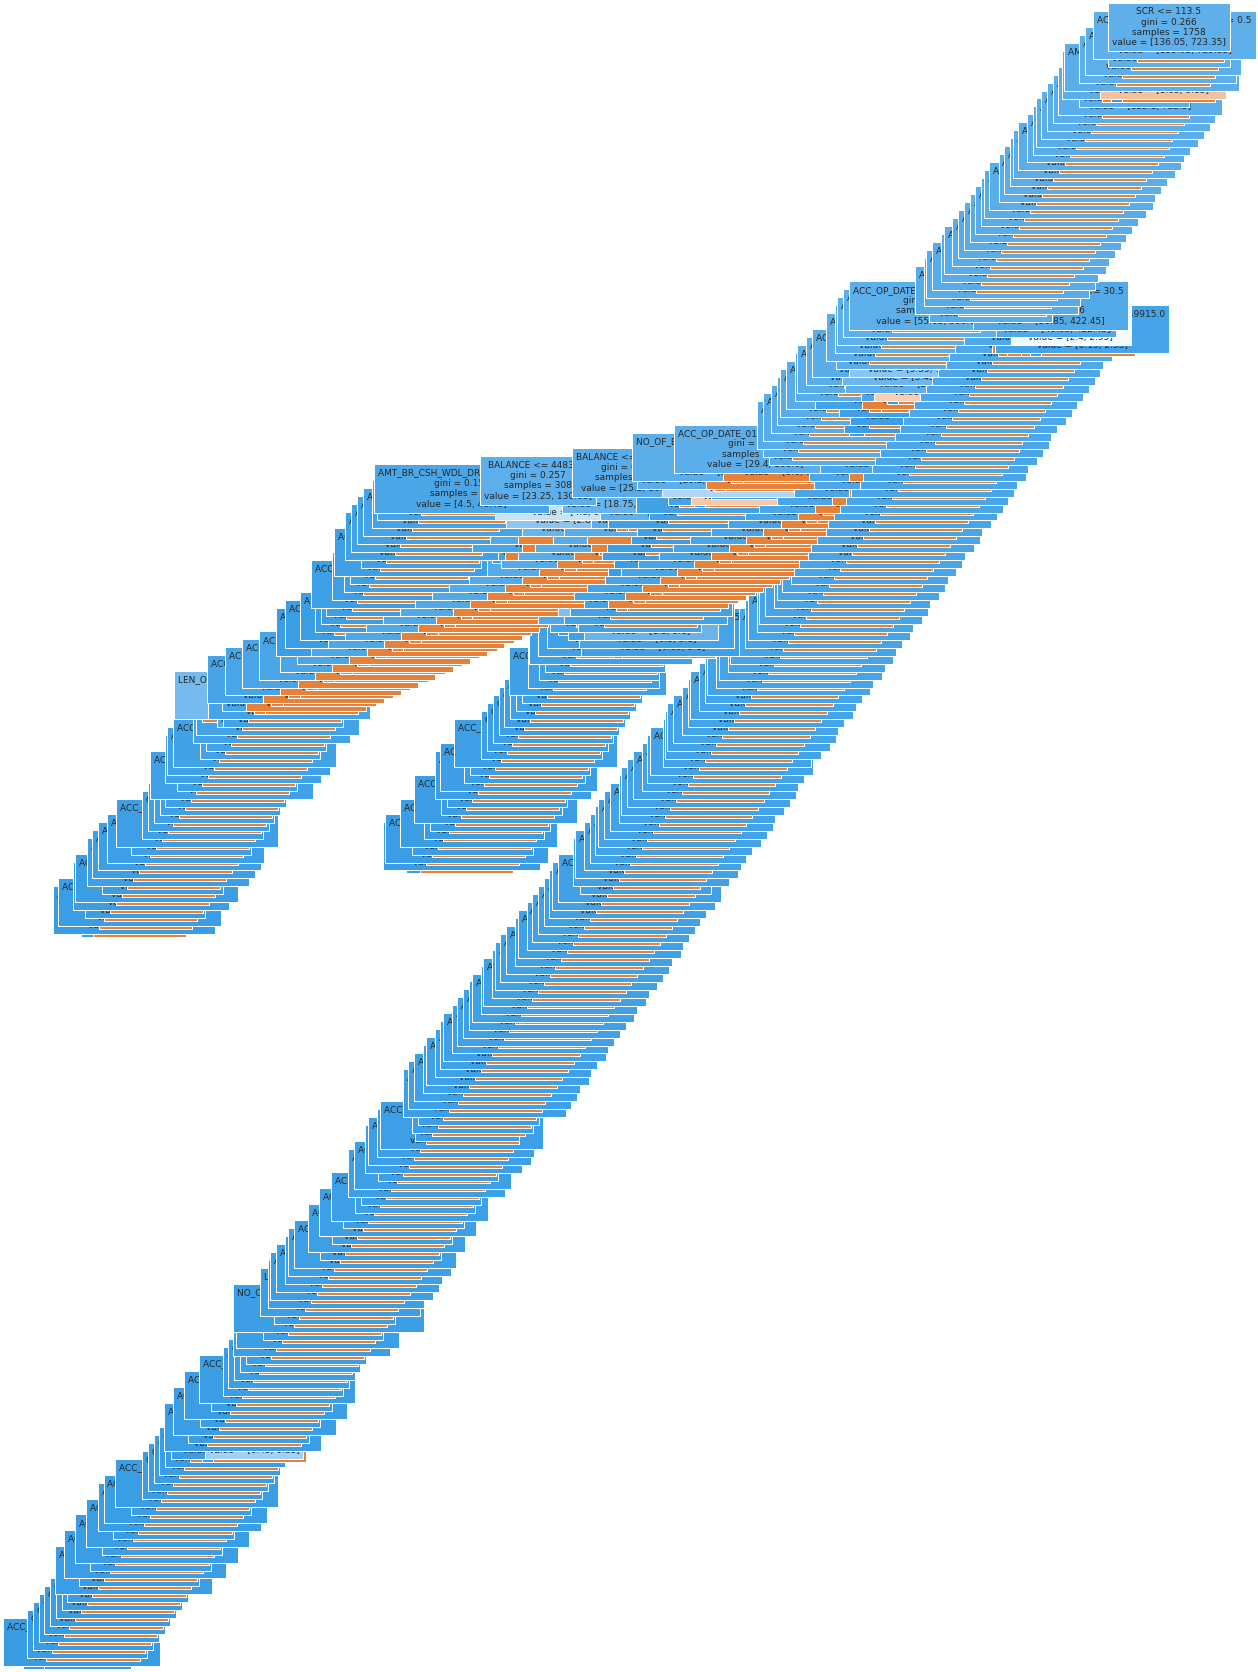

In [198]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [199]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- SCR <= 113.50
|   |--- weights: [2.40, 0.00] class: 0
|--- SCR >  113.50
|   |--- ACC_OP_DATE_12/17/2007 <= 0.50
|   |   |--- SCR <= 991.50
|   |   |   |--- ACC_OP_DATE_5/19/2006 <= 0.50
|   |   |   |   |--- ACC_OP_DATE_1/28/2009 <= 0.50
|   |   |   |   |   |--- AMT_BR_CSH_WDL_DR <= 994705.00
|   |   |   |   |   |   |--- ACC_OP_DATE_9/17/2001 <= 0.50
|   |   |   |   |   |   |   |--- BALANCE <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |   |--- BALANCE >  2.50
|   |   |   |   |   |   |   |   |--- ACC_OP_DATE_03-08-2010 <= 0.50
|   |   |   |   |   |   |   |   |   |--- ACC_OP_DATE_10/24/2002 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- ACC_OP_DATE_10/28/2002 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 194
|   |   |   |   |   |   |   |   |   |   |--- ACC_OP_DATE_10/28/2002 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |

In [200]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                            Imp
SCR                    0.044572
BALANCE                0.040110
LEN_OF_RLTN_IN_MNTH    0.032454
AMT_BR_CSH_WDL_DR      0.024931
AMT_CHQ_DR             0.018137
...                         ...
CUST_ID_C13386         0.000000
CUST_ID_C13387         0.000000
CUST_ID_C13389         0.000000
CUST_ID_C13390         0.000000
ACC_OP_DATE_9/30/2012  0.000000

[3534 rows x 1 columns]


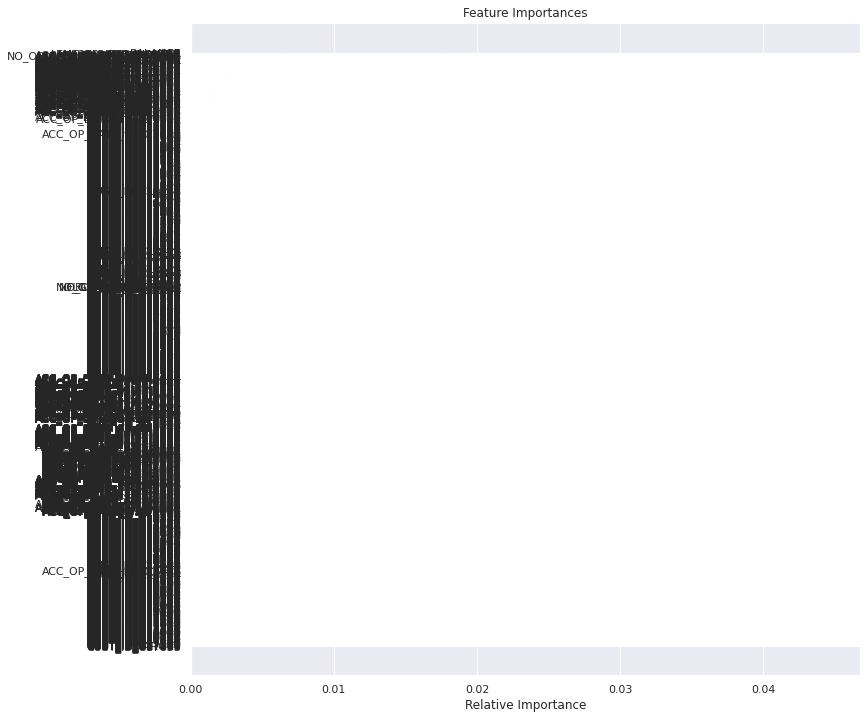

In [201]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing all the decision tree models

In [192]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
        log_reg_model_train_perf_threshold_auc_roc,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

NameError: ignored

In [185]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

NameError: ignored

## Actionable Insights

Recall looked good on all of the models. There all about 1. 
The 3nd decision tree looks the best.

FLG_HAS_ANY_CHGS: Holding all other features constant a unit change in FLG_HAS_ANY_CHGS will decrease the odds of a customer buying a loan by 0.99 times or a 7.17% decrease in the odds.
NO_OF_CHQ_DR_TXNS: Holding all other features constant a unit change in NO_OF_CHQ_DR_TXNS will decrease the odds of a customer buying a loan by 0.99 times or a 6.25% decrease in the odds.

The bank should offer loans to those with any charges and or pays alot with checks. 